In [1]:
import group_data as gd
import flylib
import numpy as np

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py
trial_db = h5py.File('trial_db.hdf5','r')
xi = np.linspace(0,23,1150)
tlag = xi-xi[1150/2.0]
tlag = tlag[:1149]
muscle_list =  ['b1','b2','b3',
                'i1','i2',
                'iii1','iii3','iii24',
                'hg1','hg2','hg3','hg4',
                'tpd','tpv','ttm','pr','wb_frequency']
swarm_names = np.array(trial_db['swarm_names'])
fly_numbers = np.array(trial_db['fly_numbers'])
wb_frequency = np.array(trial_db['wb_frequency'])
trial_names = np.array(trial_db['trial_names'])
wb_selection = np.sum(wb_frequency >50,axis = 1)>1000
swarm_set = [sw for sw in set(swarm_names) if not('pr' in sw)]
fly_set = set(fly_numbers)

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:662: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


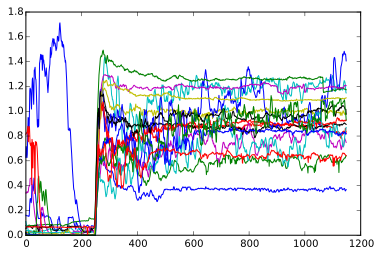

In [4]:
swarm = 'GMR22H05'
mname = 'b1'
stop_dict = dict()
trial_selection = (trial_names == 'flight_starts')

swarm_selection = (swarm == swarm_names) & trial_selection
for flynum in fly_set:
    selection  = (flynum == fly_numbers) & swarm_selection
    if sum(selection) > 2:
        extract = np.array(trial_db['wb_frequency'])[selection,:]
        include = np.sum(extract[:,0:200].T>10,axis = 0) < 100
        #print include
        if sum(include)>0:
            trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
            plot(trace)


/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


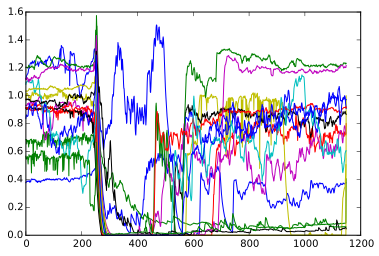

In [5]:
swarm = 'GMR22H05'
mname = 'b1'
trial_selection = (trial_names == 'flight_stops')
swarm_selection = (swarm == swarm_names) & trial_selection
for flynum in fly_set:
    selection  = (flynum == fly_numbers) & swarm_selection
    if sum(selection) > 2:
        extract = np.array(trial_db['wb_frequency'])[selection,:]
        include = np.sum(extract[:,225:500].T>10,axis = 0) < 100
        trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
        plot(trace)


In [6]:
#calculate the median xcov functions and
#load into a dictionary keyed by group and then muscle
start_dict = dict()
trial_selection = (trial_names == 'flight_starts')
#wb_selection = np.sum(wb_frequency >50)>1000
#wb_selection &= trial_selection
for swarm in swarm_set:
    print swarm
    swarm_selection = (swarm == swarm_names) & trial_selection
    start_dict[swarm] = dict()
    for mname in muscle_list:
        start_dict[swarm][mname] = list()
        for flynum in fly_set:
            selection  = (flynum == fly_numbers) & swarm_selection
            if sum(selection) > 2:
                extract = np.array(trial_db['wb_frequency'])[selection,:]
                include = np.sum(extract[:,0:200].T>10,axis = 0) < 100
                if sum(include)>2:
                    trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
                    start_dict[swarm][mname].append(trace) 

GMR22H05_GFP
GMR31E10
GMR75B06_GFP
GMR22H05
GMR29E05_GFP
GMR39E01
GMR31E10_GFP
GMR10A12
GMR74F03_GFP
GMR39E01_GFP
GMR75B06
GMR74F03
GMR29E05
GMR10A12_GFP


In [7]:
#calculate the median xcov functions and
#load into a dictionary keyed by group and then muscle
stop_dict = dict()
trial_selection = (trial_names == 'flight_stops')
#wb_selection = np.sum(wb_frequency >50)>1000
#wb_selection &= trial_selection
for swarm in swarm_set:
    print swarm
    swarm_selection = (swarm == swarm_names) & trial_selection
    stop_dict[swarm] = dict()
    for mname in muscle_list:
        stop_dict[swarm][mname] = list()
        for flynum in fly_set:
            selection  = (flynum == fly_numbers) & swarm_selection
            if sum(selection) > 2:
                extract = np.array(trial_db['wb_frequency'])[selection,:]
                include = np.sum(extract[:,225:500].T>10,axis = 0) < 100
                if sum(include)>0:
                    trace = nanmedian(np.array(trial_db[mname])[selection,:][include],axis = 0)
                    stop_dict[swarm][mname].append(trace)

GMR22H05_GFP
GMR31E10
GMR75B06_GFP
GMR22H05
GMR29E05_GFP
GMR39E01
GMR31E10_GFP
GMR10A12
GMR74F03_GFP
GMR39E01_GFP
GMR75B06
GMR74F03
GMR29E05
GMR10A12_GFP


In [8]:
import h5py
import os
#os.listdir('./')
os.remove('start_db.hdf5')
start_db = h5py.File('start_db.hdf5','a')
for key in start_dict:
    start_db.create_group(key)
    for key2 in start_dict[key].keys():
        start_db[key].create_dataset(key2,data = np.array(start_dict[key][key2]),  compression="gzip",compression_opts=5)
start_db.flush()

In [9]:
import h5py
import os
#os.listdir('./')
os.remove('stop_db.hdf5')
stop_db = h5py.File('stop_db.hdf5','a')
for key in stop_dict:
    stop_db.create_group(key)
    for key2 in stop_dict[key].keys():
        stop_db[key].create_dataset(key2,data = np.array(stop_dict[key][key2]),  compression="gzip",compression_opts=5)
stop_db.flush()

In [11]:
stop_dict

{'GMR10A12': {'b1': [array([ 0.15984727,  0.16072382,  0.16119213, ...,  0.14917067,
           0.14792282,         nan]),
   array([ 0.25435861,  0.25460759,  0.2511258 , ...,  0.22539094,
           0.22716761,         nan])],
  'b2': [array([ 0.03547706,  0.03245448,  0.0315624 , ...,  0.01430899,
           0.01506871,         nan]),
   array([ 0.00464735,  0.00588367,  0.0052035 , ...,  0.00666676,
           0.00793728,         nan])],
  'b3': [array([ 0.26169089,  0.26411106,  0.26566221, ...,  0.27177509,
           0.27739326,         nan]),
   array([ 0.27116211,  0.27086002,  0.26364768, ...,  0.28460112,
           0.28142053,         nan])],
  'hg1': [array([ 0.17169634,  0.16384966,  0.14266467, ...,  0.14918239,
           0.16545781,         nan]),
   array([ 0.03798511,  0.05082741,  0.04309796, ...,  0.13101539,
           0.13132084,         nan])],
  'hg2': [array([ 0.1012351 ,  0.04647986,  0.07292799, ...,  0.44195926,
           0.45065172,         nan]),
   arra